In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import r2_score

In [2]:
df=fetch_california_housing()

In [3]:
X=pd.DataFrame(df.data,columns=df.feature_names)
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [4]:
y=pd.Series(df.target)
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Length: 20640, dtype: float64

In [5]:
X.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


In [6]:
X=X[['MedInc','AveRooms','AveBedrms']]

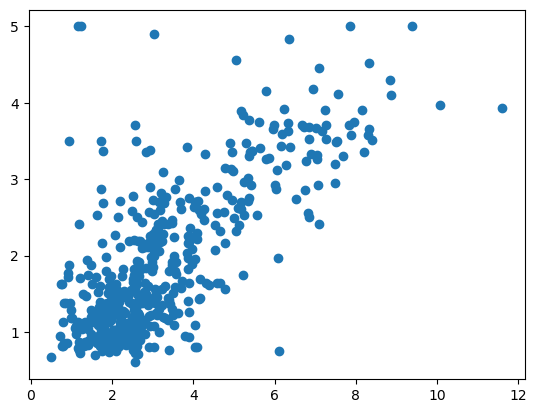

In [26]:
plt.scatter(X['MedInc'][:500], y[:500],)

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [8]:
lr=LinearRegression()

In [9]:
lr.fit(X_train,y_train)

LinearRegression()

In [10]:
y_predict=lr.predict(X_test)

In [11]:
X_test.iloc[[0],:]

,MedInc,AveRooms,AveBedrms
10385,6.4114,7.527559,1.049869


In [12]:
y_test

10385    2.787
1943     2.076
7490     0.967
16889    3.538
11416    3.905
         ...  
13767    1.466
20606    0.566
7340     1.760
14312    0.773
20262    2.354
Length: 4128, dtype: float64

In [13]:
y_predict[0]

2.8718099071650194

In [14]:
r2=r2_score(y_test,y_predict)
r2

0.48131185188237524

In [15]:
n=len(y_test)
n

4128

In [16]:
k=X_test.shape[1]
k

3

In [17]:
adust_r2=((1-r2)*(n-1))/(n-k-1)

In [18]:
adust_r2

0.5190654673330353